Comenzamos importando todas las librerías que necesitaremos.

In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [16]:
#Ignoraremos todos los warnings de pandas.
warnings.filterwarnings('ignore')

Carga de fuentes de datos.

In [17]:
df_deptos = pd.read_csv(r'dataframes/venta_deptos_limpio.csv')

Veo que contiene dicho csv.

In [18]:
df_deptos

,urls,precio,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras
0,/propiedades/clasificado/veclappa-departamento...,115000,Av-Vélez-Sarsfield,700.0,73.0,64.0,3.0,1.0,2.0,0.0
1,/propiedades/clasificado/veclapin-departamento...,200000,Arturo-Illia,600.0,0.0,0.0,0.0,3.0,3.0,1.0
2,/propiedades/clasificado/veclapin-departamento...,45000,Av-Las-Heras,700.0,38.0,38.0,1.0,1.0,0.0,0.0
3,/propiedades/clasificado/veclapin-venta-de-mon...,37000,Entre-Rios,367.0,29.0,25.0,1.0,1.0,0.0,0.0
4,/propiedades/clasificado/veclapin-departamento...,120000,Mitre,700.0,80.0,80.0,0.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
307,/propiedades/clasificado/veclapin-ameghino-935...,75000,Ameghino,935.0,120.0,98.0,5.0,2.0,3.0,1.0
308,/propiedades/clasificado/veclapin-terreno-de-1...,40000,Echeverria,1935.0,200.0,140.0,0.0,4.0,6.0,1.0
309,/propiedades/clasificado/veclapin-venta-de-amp...,70000,Marcelo-Torcuato-De-Alvear,600.0,141.0,141.0,8.0,2.0,4.0,0.0
310,/propiedades/clasificado/veclapin-departamento...,35000,Mz-C--Casa-720--Tira,100.0,70.0,70.0,4.0,1.0,3.0,1.0


In [19]:
#Verificamos que la nueva columna esté.
df_deptos.head()

,urls,precio,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras
0,/propiedades/clasificado/veclappa-departamento...,115000,Av-Vélez-Sarsfield,700.0,73.0,64.0,3.0,1.0,2.0,0.0
1,/propiedades/clasificado/veclapin-departamento...,200000,Arturo-Illia,600.0,0.0,0.0,0.0,3.0,3.0,1.0
2,/propiedades/clasificado/veclapin-departamento...,45000,Av-Las-Heras,700.0,38.0,38.0,1.0,1.0,0.0,0.0
3,/propiedades/clasificado/veclapin-venta-de-mon...,37000,Entre-Rios,367.0,29.0,25.0,1.0,1.0,0.0,0.0
4,/propiedades/clasificado/veclapin-departamento...,120000,Mitre,700.0,80.0,80.0,0.0,2.0,2.0,1.0


Ahora que tenemos las columnas que creemos que vamos a necesitar, tomamos un resumen de los datos que contiene.

In [20]:
cantidad_elementos = df_deptos.size
cantidad_nulos_por_columna = df_deptos.isnull().sum()
tipos_de_dato_por_columna = df_deptos.dtypes
descripcion_estadistica = df_deptos.describe()

print("Cantidad de elementos en el DataFrame:", cantidad_elementos)
print("\nCantidad de valores nulos por columna:")
print(cantidad_nulos_por_columna)
print("\nTipo de dato en cada columna:")
print(tipos_de_dato_por_columna)
print("\nDescripción estadística del DataFrame:")
print(descripcion_estadistica)

Cantidad de elementos en el DataFrame: 3120

Cantidad de valores nulos por columna:
urls                0
precio              0
calle               0
altura              0
metros_totales      0
metros_cubiertos    0
ambientes           0
banios              0
dormitorios         0
cocheras            0
dtype: int64

Tipo de dato en cada columna:
urls                 object
precio                int64
calle                object
altura              float64
metros_totales      float64
metros_cubiertos    float64
ambientes           float64
banios              float64
dormitorios         float64
cocheras            float64
dtype: object

Descripción estadística del DataFrame:
              precio       altura  metros_totales  metros_cubiertos  \
count     312.000000   312.000000      312.000000        312.000000   
mean    66798.076923   583.814103       78.685897         66.224359   
std     54632.542710   558.666992       68.197020         63.071090   
min      1000.000000     0.000000 

Habiendo obtenido detalles de nuestros datos, podemos realizar una limpieza de los mismos.

In [21]:
#Las columnas 'metros_totales' y 'metros_cubiertos' tienen valores nulos que son relevantes a la hora de comprar un departamento, por lo que descartamos dichas filas para no tenerlas en cuenta.
df_deptos = df_deptos.dropna(subset=['metros_totales', 'metros_cubiertos'])

#Como son departamentos, estos también pueden ser usados para el comercio, por lo que no necesariamente tienen baños o dormitorios. Por esto, reemplazaremos los valores nulos de dichas columnas por 0.
df_deptos['banios'] = df_deptos['banios'].fillna(0)
df_deptos['dormitorios'] = df_deptos['dormitorios'].fillna(0)

#También, los departamentos pueden no tener cochera, entonces reemplazamos esos valores nulos por 0.
df_deptos['cocheras'] = df_deptos['cocheras'].fillna(0)

In [22]:
#Aún nos queda ver qué ocurre con la columna 'altura' que tiene valores nulos, por lo que traemos esas filas.
df_deptos[df_deptos['altura'].isnull()]

,urls,precio,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras


In [23]:
#Como se puede ver, no están las direcciones de estos departamentos. Como nos interesan saber todos los datos de cada departamento, estos no sirven por lo que procedemos a dropear estas filas.
df_deptos = df_deptos.dropna(subset=['altura'])

In [24]:
#Un último chequeo de que ya no queden valores nulos.
cantidad_nulos_por_columna = df_deptos.isnull().sum()
print("\nCantidad de valores nulos por columna:")
print(cantidad_nulos_por_columna)


Cantidad de valores nulos por columna:
urls                0
precio              0
calle               0
altura              0
metros_totales      0
metros_cubiertos    0
ambientes           0
banios              0
dormitorios         0
cocheras            0
dtype: int64


In [25]:
#Repasando un poco los tipos de datos, las columnas de altura, baños, dormitorios y cocheras están en tipo real cuando es mejor tenerlas en enteros. Realizamos esa formalización.
df_deptos['altura'] = df_deptos['altura'].astype(int)
df_deptos['banios'] = df_deptos['banios'].astype(int)
df_deptos['dormitorios'] = df_deptos['dormitorios'].astype(int)
df_deptos['cocheras'] = df_deptos['cocheras'].astype(int)

df_deptos.head()

,urls,precio,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras
0,/propiedades/clasificado/veclappa-departamento...,115000,Av-Vélez-Sarsfield,700,73.0,64.0,3.0,1,2,0
1,/propiedades/clasificado/veclapin-departamento...,200000,Arturo-Illia,600,0.0,0.0,0.0,3,3,1
2,/propiedades/clasificado/veclapin-departamento...,45000,Av-Las-Heras,700,38.0,38.0,1.0,1,0,0
3,/propiedades/clasificado/veclapin-venta-de-mon...,37000,Entre-Rios,367,29.0,25.0,1.0,1,0,0
4,/propiedades/clasificado/veclapin-departamento...,120000,Mitre,700,80.0,80.0,0.0,2,2,1


Gráficos de datos.

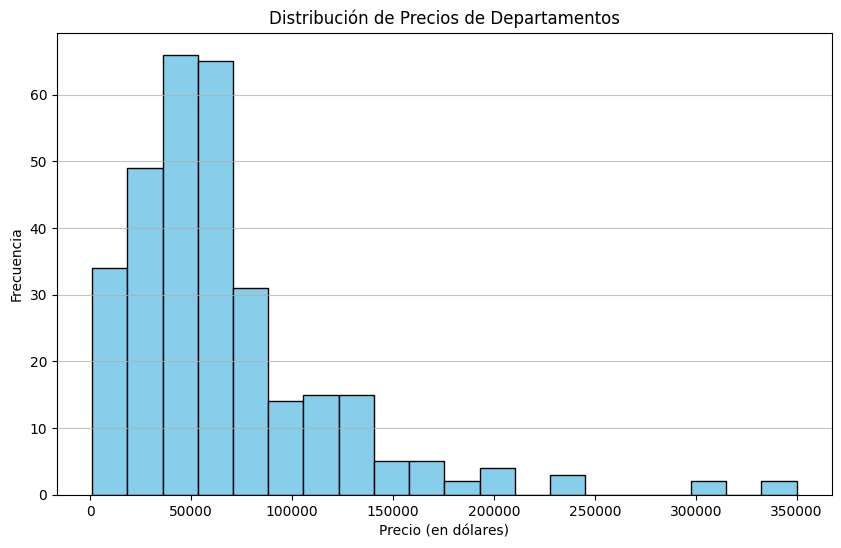

In [26]:
#Histograma de precios

plt.figure(figsize=(10, 6))
plt.hist(df_deptos['precio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de Departamentos')
plt.xlabel('Precio (en dólares)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

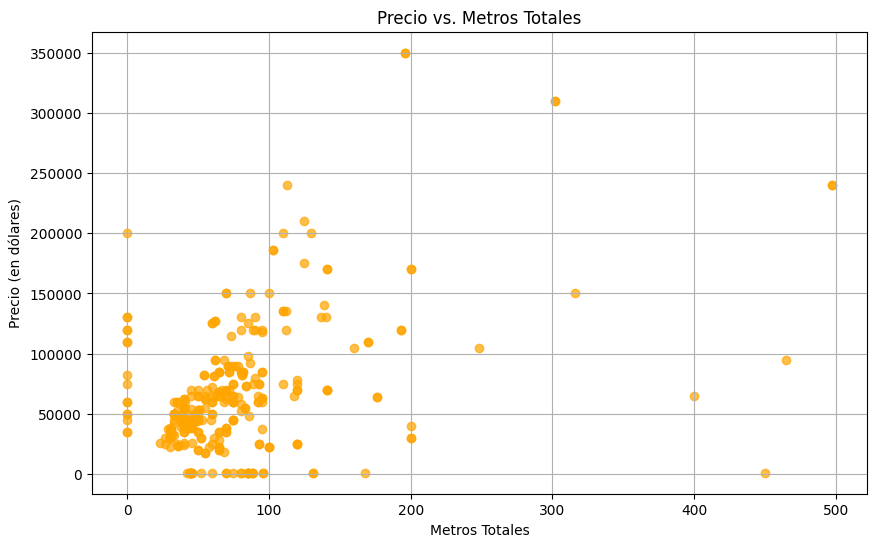

In [27]:
#Gráfico de dispersión.

plt.figure(figsize=(10, 6))
plt.scatter(df_deptos['metros_totales'], df_deptos['precio'], alpha=0.7, color='orange')
plt.title('Precio vs. Metros Totales')
plt.xlabel('Metros Totales')
plt.ylabel('Precio (en dólares)')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

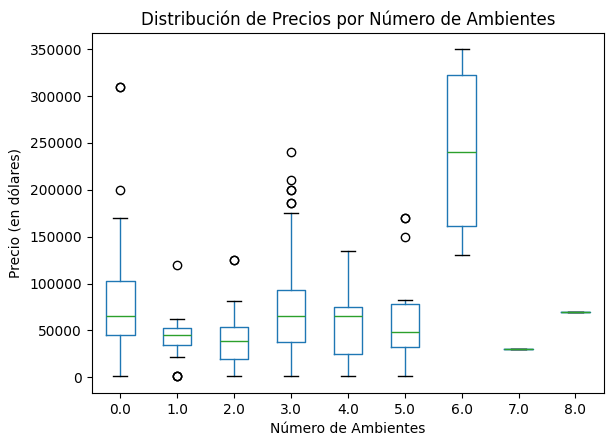

In [28]:
#Boxplot de Precios por Número de Ambientes.

plt.figure(figsize=(10, 6))
df_deptos.boxplot(column='precio', by='ambientes', grid=False)
plt.title('Distribución de Precios por Número de Ambientes')
plt.suptitle('')
plt.xlabel('Número de Ambientes')
plt.ylabel('Precio (en dólares)')
plt.show()

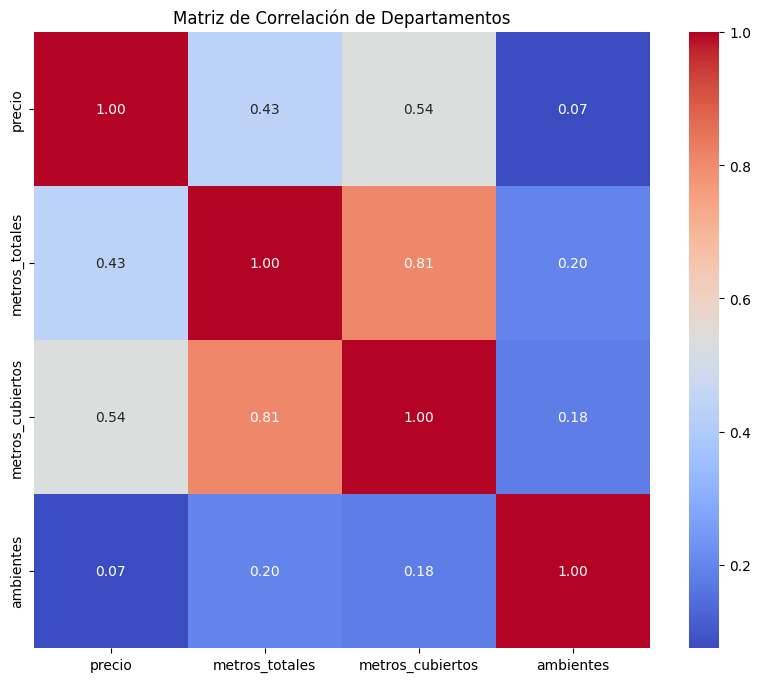

In [29]:
#Matriz de correlación.

#Seleccionamos solo las columnas numéricas.
numeric_df = df_deptos.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación de Departamentos')
plt.show()